## Introduction and describe

RU describre:  В рамках задачи регрессии нужно предсказать цену телефона, для классификации - операционную систему или год выпуска устройства.
Для задачи кластеризации необходимо запустить алгоритм кластеризации, в котором количество кластеров и признаки можете выбрать на свое усмотрение.

EN:  As part of the regression task, you need to predict the price of the phone, for classification - the operating system or the year of release of the device.
For the clustering task, it is necessary to run a clustering algorithm in which you can choose the number of clusters and features at your discretion.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
phones = pd.read_csv('kaggle_phone_prices.csv')
phones

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


## Cleaning data and add features
- cleaning of columns from letters and symbols
- separation of the column from the camera into columns for each individual camera
- adding a column by the number of smartphone screens and screen size for each individual screen if phone has 2 screens
- removing duplicate rows

In [16]:
col = phones.columns
phones = phones.rename(columns={ col[0]: 'brand',
                col[1]: 'model',
                col[2]: 'memory',
                col[3]: 'ram',
                col[4]: 'screen',
                col[5]: 'camera',
                col[6]: 'battery',
                col[7]: 'price'})
phones.head()

,brand,model,memory,ram,screen,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [23]:
phones['brand'] = phones['brand'].str.lower()
phones['model'] = phones['model'].str.lower()
phones['memory'] = phones['memory'].str.replace(' GB', '')
phones['ram'] = phones['ram'].str.replace(' GB', '')
phones['num_camer'] =phones['camera'].str.count('\\+') + 1
#phones.drop (columns=phones.columns [-2], axis= 1 , inplace= True )
res1 = []
res2 = []
res3 = []
res4 = []
for cam, num_cam in zip(phones['camera'], phones['num_camer']):
    resolutions = cam.split('+')    
    if num_cam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')
    
    if num_cam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')
    
    if num_cam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')
    
    if num_cam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])
    
phones['camer_1'] = res1
phones['camer_2'] = res2
phones['camer_3'] = res3
phones['camer_4'] = res4
phones

,brand,model,memory,ram,screen,camera,battery,price,num_camer,camer_1,camer_2,camer_3,camer_4
0,apple,iphone 13 pro,128,6,6.1,12 + 12 + 12,3095,999,3,12,12,12,0
1,samsung,galaxy s21 ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199,4,108,10,10,12
2,oneplus,9 pro,128,8,6.7,48 + 50 + 8 + 2,4500,899,4,48,50,8,2
3,xiaomi,redmi note 10 pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,4,64,8,5,2
4,google,pixel 6,128,8,6.4,50 + 12.2,4614,799,2,50,12.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,samsung,galaxy note20 5g,128,8,6.7,12+64+12,4300,1049,3,12,64,12,0
403,xiaomi,mi 10 lite 5g,128,6,6.57,48+8+2+2,4160,349,4,48,8,2,2
404,apple,iphone 12 pro max,128,6,6.7,12+12+12,3687,1099,3,12,12,12,0
405,oppo,reno3,128,8,6.4,48+13+8+2,4025,429,4,48,13,8,2


In [97]:
#phones['memory'] = phones['memory'].str.replace('GB', '')
#phones['ram'] = phones['ram'].str.replace('GB', '')
phones['price'] = phones['price'].str.replace('$', '')
phones['price'] = phones['price'].str.replace(',', '')
phones['camer_1'] = phones['camer_1'].str.replace('MP ', '')
phones['camer_1'] = phones['camer_1'].str.replace('MP', '')

phones['camer_2'] = phones['camer_2'].str.replace('MP ', '')
phones['camer_2'] = phones['camer_2'].str.replace('MP', '')
phones['camer_2'] = phones['camer_2'].str.replace(' ', '')


phones['camer_3'] = phones['camer_3'].str.replace('MP ', '')
phones['camer_3'] = phones['camer_3'].str.replace('MP', '')
phones['camer_3'] = phones['camer_3'].str.replace(' ', '')


phones['camer_4'] = phones['camer_4'].str.replace('MP ', '')
phones['camer_4'] = phones['camer_4'].str.replace('MP', '')
phones['camer_4'] = phones['camer_4'].str.replace(' ', '')
num_scr = []
for scre in phones['screen']:
    if len(scre) > 4:
        num_scr.append(2)
    else:
        num_scr.append(1)
phones['num_screen'] = num_scr
phones['screen'].unique()

C:\Users\STEN CENTER ROSTOV\AppData\Local\Temp\ipykernel_11660\2472091625.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  phones['price'] = phones['price'].str.replace('$', '')


array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [99]:
frst_screen = []
sec_screen = []
for screen in phones['screen']:
    if screen == '6.8 + 3.9':
        frst_screen.append(6.8)
        sec_screen.append(3.9)
    elif screen == '7.6 (unfolded)':
        frst_screen.append(7.6)
        sec_screen.append(3.5)
    else:
        frst_screen.append(float(screen))
        sec_screen.append(0.0)
phones['first_screen'] = frst_screen
phones['second_screen'] = sec_screen

In [129]:
#phones = phones.drop(columns='screen')
phones = phones.replace(['3D', 'ToF'], [3.0, 0.0])

In [130]:
#phones = phones.drop(columns='camera')
phones['memory'] = pd.to_numeric(phones['memory'])
phones['ram'] = pd.to_numeric(phones['ram'])
phones['price'] = pd.to_numeric(phones['price'])
phones['camer_1'] = pd.to_numeric(phones['camer_1'])
phones['camer_2'] = pd.to_numeric(phones['camer_2'])
phones['camer_3'] = pd.to_numeric(phones['camer_3'])
phones['camer_4'] = pd.to_numeric(phones['camer_4'])



In [131]:
phones.info()
nonuniq_line = round(phones.duplicated().mean() * 100, 2)
print(f'Duplicated data line: {nonuniq_line}%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          407 non-null    object 
 1   model          407 non-null    object 
 2   memory         407 non-null    int64  
 3   ram            407 non-null    int64  
 4   battery        407 non-null    int64  
 5   price          407 non-null    int64  
 6   num_camer      407 non-null    int64  
 7   camer_1        407 non-null    float64
 8   camer_2        407 non-null    float64
 9   camer_3        407 non-null    int64  
 10  camer_4        407 non-null    float64
 11  num_screen     407 non-null    int64  
 12  first_screen   407 non-null    float64
 13  second_screen  407 non-null    float64
dtypes: float64(5), int64(7), object(2)
memory usage: 44.6+ KB
Duplicated data line: 12.04%


In [132]:
uniq_line = phones.drop_duplicates()
perc_uniq = round(uniq_line.duplicated().mean() * 100, 2)
print(f'Unique data line: {perc_uniq}%')
uniq_line.reset_index()

Unique data line: 0.0%


,index,brand,model,memory,ram,battery,price,num_camer,camer_1,camer_2,camer_3,camer_4,num_screen,first_screen,second_screen
0,0,apple,iphone 13 pro,128,6,3095,999,3,12.0,12.0,12,0.0,1,6.10,0.0
1,1,samsung,galaxy s21 ultra,256,12,5000,1199,4,108.0,10.0,10,12.0,1,6.80,0.0
2,2,oneplus,9 pro,128,8,4500,899,4,48.0,50.0,8,2.0,1,6.70,0.0
3,3,xiaomi,redmi note 10 pro,128,6,5020,279,4,64.0,8.0,5,2.0,1,6.67,0.0
4,4,google,pixel 6,128,8,4614,799,2,50.0,12.2,0,0.0,1,6.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,401,huawei,p30 lite,128,4,3340,329,3,48.0,8.0,2,0.0,1,6.15,0.0
354,402,samsung,galaxy note20 5g,128,8,4300,1049,3,12.0,64.0,12,0.0,1,6.70,0.0
355,403,xiaomi,mi 10 lite 5g,128,6,4160,349,4,48.0,8.0,2,2.0,1,6.57,0.0
356,404,apple,iphone 12 pro max,128,6,3687,1099,3,12.0,12.0,12,0.0,1,6.70,0.0


In [133]:
uniq_line

,brand,model,memory,ram,battery,price,num_camer,camer_1,camer_2,camer_3,camer_4,num_screen,first_screen,second_screen
0,apple,iphone 13 pro,128,6,3095,999,3,12.0,12.0,12,0.0,1,6.10,0.0
1,samsung,galaxy s21 ultra,256,12,5000,1199,4,108.0,10.0,10,12.0,1,6.80,0.0
2,oneplus,9 pro,128,8,4500,899,4,48.0,50.0,8,2.0,1,6.70,0.0
3,xiaomi,redmi note 10 pro,128,6,5020,279,4,64.0,8.0,5,2.0,1,6.67,0.0
4,google,pixel 6,128,8,4614,799,2,50.0,12.2,0,0.0,1,6.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,huawei,p30 lite,128,4,3340,329,3,48.0,8.0,2,0.0,1,6.15,0.0
402,samsung,galaxy note20 5g,128,8,4300,1049,3,12.0,64.0,12,0.0,1,6.70,0.0
403,xiaomi,mi 10 lite 5g,128,6,4160,349,4,48.0,8.0,2,2.0,1,6.57,0.0
404,apple,iphone 12 pro max,128,6,3687,1099,3,12.0,12.0,12,0.0,1,6.70,0.0


In [134]:
uniq_line.describe()

,memory,ram,battery,price,num_camer,camer_1,camer_2,camer_3,camer_4,num_screen,first_screen,second_screen
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,125.050279,5.910615,4695.363128,411.991620,3.145251,43.616201,9.218436,3.748603,0.989665,1.005587,6.481508,0.020670
std,67.913050,2.510002,780.972153,310.076059,0.760449,24.942903,10.493717,5.112015,1.738872,0.074639,0.302918,0.276569
min,32.000000,2.000000,1821.000000,99.000000,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000,4.500000,0.000000
25%,64.000000,4.000000,4300.000000,199.000000,3.000000,13.000000,2.000000,2.000000,0.000000,1.000000,6.440000,0.000000
50%,128.000000,6.000000,5000.000000,299.000000,3.000000,48.000000,8.000000,2.000000,0.000000,1.000000,6.500000,0.000000
75%,128.000000,8.000000,5000.000000,499.000000,4.000000,64.000000,12.000000,5.000000,2.000000,1.000000,6.600000,0.000000
max,512.000000,16.000000,7000.000000,1999.000000,4.000000,108.000000,64.000000,48.000000,12.000000,2.000000,7.600000,3.900000


In [136]:
uniq_line.sort_values(by='price', ascending=False).head(10)
uniq_line.sort_values(by='price', ascending=True).head(10)

,brand,model,memory,ram,battery,price,num_camer,camer_1,camer_2,camer_3,camer_4,num_screen,first_screen,second_screen
107,nokia,c20 plus,32,3,4950,99,2,8.0,2.0,0,0.0,1,6.50,0.0
261,realme,c20,32,2,5000,99,1,8.0,0.0,0,0.0,1,6.50,0.0
250,realme,c11 2021,32,2,5000,99,2,8.0,2.0,0,0.0,1,6.50,0.0
109,motorola,moto e7i power,32,2,5000,99,2,13.0,2.0,0,0.0,1,6.50,0.0
273,realme,c11,32,2,5000,99,2,13.0,2.0,0,0.0,1,6.50,0.0
53,realme,narzo 50i,32,2,5000,99,2,50.0,2.0,0,0.0,1,6.50,0.0
216,realme,c11 2021,32,2,5000,99,2,8.0,2.0,0,0.0,1,6.52,0.0
139,nokia,c20 plus,32,3,4950,109,2,8.0,2.0,0,0.0,1,6.50,0.0
262,nokia,1.4,32,2,4000,119,2,8.0,2.0,0,0.0,1,6.51,0.0
380,xiaomi,redmi 9c,64,3,5000,119,3,13.0,2.0,2,0.0,1,6.53,0.0


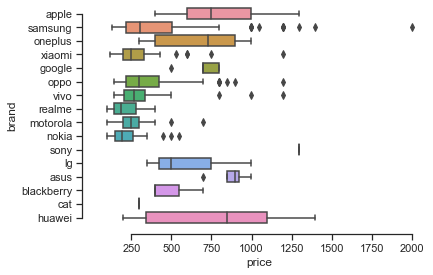

In [151]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
boxplot = sns.boxplot(x="price", y="brand",
          data=uniq_line, orient='h')
sns.despine(offset=10, trim=True)

In [152]:
print('The expensive cell phones of each brand')
uniq_line.groupby('brand')[['model','price']].max().sort_values(by='price',ascending=False)

The expensive cell phones of each brand


,model,price
brand,,
samsung,galaxy z fold2 5g,1999
huawei,y7p,1399
apple,iphone xs max,1299
sony,xperia 5 iii,1299
oppo,reno6 z 5g,1199
vivo,y72 5g,1199
xiaomi,redmi note 9s,1199
asus,zenfone 8 flip,999
lg,wing,999


In [153]:
print('The cheapest cell phones of each brand')
uniq_line.groupby('brand')[['model','price']].min().sort_values(by='price',ascending=False)

The cheapest cell phones of each brand


,model,price
brand,,
sony,xperia 5 iii,1299
asus,rog phone 5,699
google,pixel 4,499
apple,iphone 11,399
blackberry,evolve,399
lg,k92 5g,349
cat,s42,299
oneplus,7 pro,299
huawei,mate 30 pro 5g,199


<AxesSubplot:>

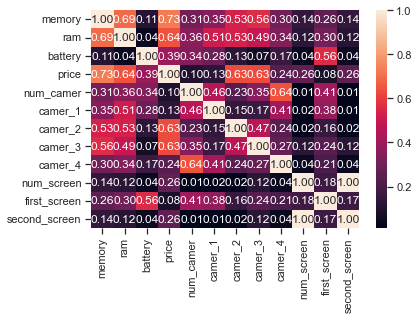

In [163]:
sns.heatmap(abs(uniq_line.corr()), annot=True, fmt='.2f', linecolor='black')

In [165]:
abs(uniq_line.corr()['price']).sort_values()

first_screen     0.084695
num_camer        0.095444
camer_1          0.131728
camer_4          0.238597
second_screen    0.256207
num_screen       0.263125
battery          0.393223
camer_3          0.629610
camer_2          0.630445
ram              0.642047
memory           0.727303
price            1.000000
Name: price, dtype: float64

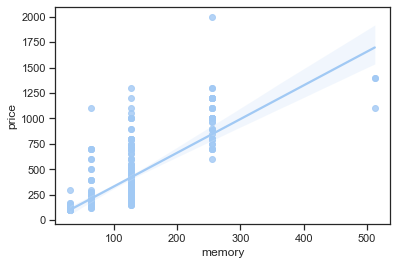

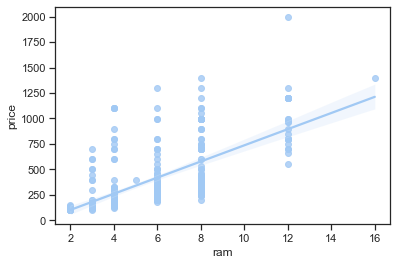

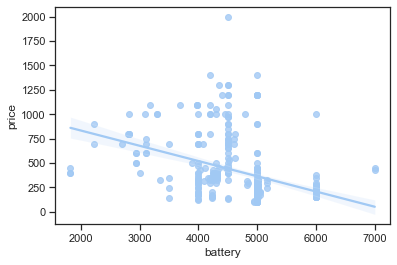

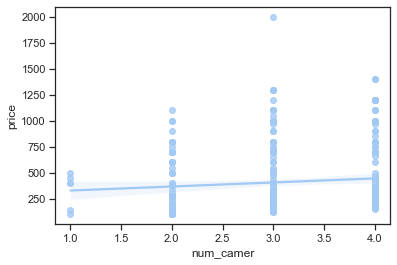

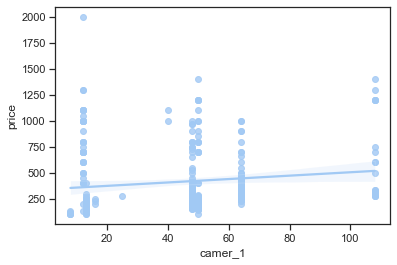

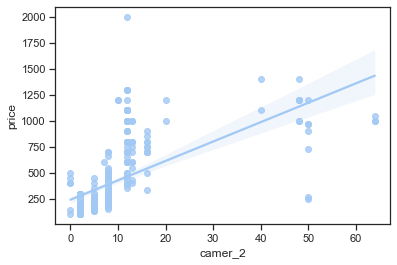

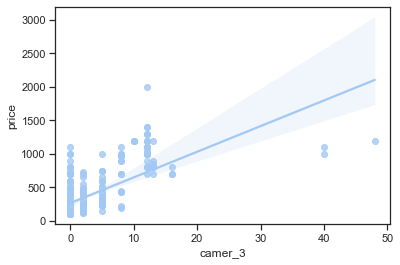

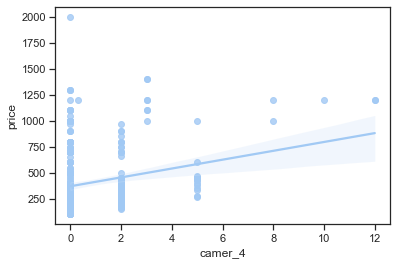

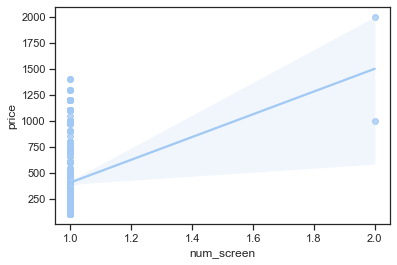

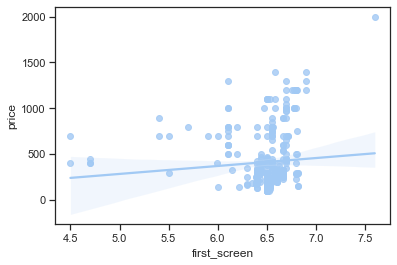

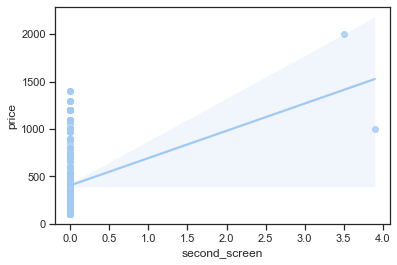

In [166]:
for feature in uniq_line:
    if feature in ['brand','model','price']:
        continue
    
    sns.regplot(y=uniq_line['price'],x=uniq_line[feature])
    plt.show()

In [181]:
from sklearn.linear_model import LinearRegression

X = phones[['memory', 'ram', 'camer_2', 'camer_3']]
y = phones['price']

reg = LinearRegression().fit(X, y)
a = reg.intercept_
[b1, b2, b3, b4] = reg.coef_



def reg_prediction(memory, ram, cam_2, cam_3):
    return a + b1*memory + b2*ram + b3*cam_2 + b4*cam_3 
print(reg_prediction(X.memory[0], X.ram[0], X.camer_2[0], X.camer_3[0]))
print(y[0])

563.0598628506866
999


In [24]:
from sklearn.ensemble import RandomForestClassifier

y = phones['price']
features = ['disk', 'os', 'year']

X = pd.get_dummies(phones[features])

model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X)